# Rotten Tomatoes Critical Rating vs Runtime and Critical Rating vs Genre 

# Import Pandas, Numpy, etc. and EDA on RT Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

rt_movies_df = pd.read_csv('../data/zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_reviews_df = pd.read_csv('../data/zippedData/rt.reviews.tsv.gz', sep='\t', encoding= 'unicode_escape')

After importing the correct data and packages I did some preliminary EDA to understand how the data was structured.

In [16]:
rt_movies_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [17]:
rt_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [18]:
rt_movies_df.shape

(1560, 12)

In [19]:
rt_reviews_df.head(30)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [20]:
rt_reviews_df.shape

(54432, 8)

In [21]:
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [22]:
rt_reviews_df.dropna()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
...,...,...,...,...,...,...,...,...
54419,2000,"Sleek, shallow, but frequently amusing.",2.5/4,fresh,Gene Seymour,1,Newsday,"September 27, 2002"
54420,2000,The spaniel-eyed Jean Reno infuses Hubert with...,3/4,fresh,Megan Turner,1,New York Post,"September 27, 2002"
54421,2000,"Manages to be somewhat well-acted, not badly a...",1.5/4,rotten,Bob Strauss,0,Los Angeles Daily News,"September 27, 2002"
54422,2000,Arguably the best script that Besson has writt...,3.5/5,fresh,Wade Major,0,Boxoffice Magazine,"September 27, 2002"


# EDA Of Fresh vs Rotten and Rating Scale 

I took a look at the unique values in 'fresh' vs rotten and 'rating' - this is where I realized the ratings had not been normalized and that I would need to do that to get any meaningful analyusis of the critical rating.

In [25]:
rt_reviews_df['fresh'].value_counts()

fresh     33035
rotten    21397
Name: fresh, dtype: int64

In [26]:
rt_reviews_df['rating'].value_counts()

3/5       4327
4/5       3672
3/4       3577
2/5       3160
2/4       2712
          ... 
6.2          1
9.7          1
4.0/10       1
3.3          1
1.8          1
Name: rating, Length: 186, dtype: int64

# Joining Movies & Review RT sets

In [14]:
joinedrt = rt_movies_df.set_index('id').join(rt_reviews_df, on = 'id', lsuffix = ' guidelines', rsuffix =' critical')

In [15]:
joinedrt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   synopsis           1498 non-null   object
 1   rating guidelines  1557 non-null   object
 2   genre              1552 non-null   object
 3   director           1361 non-null   object
 4   writer             1111 non-null   object
 5   theater_date       1201 non-null   object
 6   dvd_date           1201 non-null   object
 7   currency           340 non-null    object
 8   box_office         340 non-null    object
 9   runtime            1530 non-null   object
 10  studio             494 non-null    object
 11  id                 1560 non-null   int64 
 12  review             1380 non-null   object
 13  rating critical    1157 non-null   object
 14  fresh              1560 non-null   object
 15  critic             1484 non-null   object
 16  top_critic         1560 non-null   int64 


In [ ]:
joinedrt.head()

In [ ]:
joinedrt['fresh'].value_counts()

In [ ]:
joinedrt['runtime'].value_counts()

In [ ]:
joinedrt.info()

In [ ]:
joinedrt = joinedrt.dropna(subset = ['runtime'])

In [ ]:
joinedrt.info()

Above I joined the two data sets together and dropped any movies that did not have a 'runtime' category as I initially wanted to do a comparison of critical rating and runtime!

# Mapping Fresh Score to 0/1 and Normalizing Rating Systems

Below I mapped out the fresh/rotten scale to a 0/1 scale. Additionally, I had to normalized the rating sytems from their various scales all into one scale from 0-100. 

In [27]:
joinedrt['freshnum'] = joinedrt['fresh'].map({'fresh': 1, 'rotten': 0})

In [28]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

In [29]:
joinedrt['rating critical'].value_counts()

3/4      139
4/5      125
3/5      102
3.5/4     82
2/5       64
        ... 
F          1
0          1
2/10       1
2.5        1
2.0/5      1
Name: rating critical, Length: 62, dtype: int64

In [30]:
joinedrt['rating critical'] = joinedrt['rating critical'].replace({'3/4' : 75, '4/5' : 80, '3/5' : 60, '1/4': 25, '1/5': 20,'3.5/4' : 87, '2/5': 40, '2/4': 50, '3.7/5': 74})

In [31]:
joinedrt['rating critical'] = joinedrt['rating critical'].replace({'2.5/4': 63, '3.5/5' : 70, '5/5': 100, 'B': 85, '4/4': 100, 'B+': 88, "A-": 93, '2.5/5' : 50, "8/10" : 80, 'B-': 82, '4.5/5': 90, '1.5/4': 37.5, 'A': 95, '6/10': 60, 'C+': 77, '9/10': 90, "C": 74, 'C-': 72, '5/10': 50, '1.5/5': 30, '7/10': 70})

In [32]:
joinedrt['rating critical'] = joinedrt['rating critical'].replace({'0/5':0, '8': 80, '1': 10, '4/10': 40, 'D+': 69, '7': 70, '3/10': 30, 'D': 67, "0.5/4": 13, '6': 60}) 

In [33]:
joinedrt['rating critical'] = joinedrt['rating critical'].replace({"3": 30, "D-": 66, "1/10": 10, '0/4' : 0, '8.5/10': 85, "A+": 98, '4.0/4': 100, "8.4/10": 84, "9": 90, "F": 35, "7.5/10": 75, "7.7": 77, "2": 20, "0": 0, "2.0/5": 40, '0.5/10': 5}) 

In [34]:
joinedrt['rating critical'] = joinedrt['rating critical'].replace({'2/10': 20, '5.0/5': 100, '3.0/5': 60, "2.5": 50, '5': 50, '2.2/5': 44})

In [35]:
joinedrt['rating critical'].value_counts()

80.0     151
75.0     140
60.0     119
50.0      93
87.0      82
100.0     78
40.0      69
63.0      58
70.0      54
85.0      41
90.0      33
88.0      32
93.0      28
20.0      24
82.0      19
95.0      16
37.5      16
30.0      15
77.0      14
74.0      13
25.0      12
0.0       11
72.0      11
10.0       8
13.0       4
69.0       4
67.0       3
66.0       2
98.0       2
84.0       2
35.0       1
44.0       1
5.0        1
Name: rating critical, dtype: int64

The rating systems for different critics and their respective websites vary drastically. This can be anything from an A-F rating or a 0-100 rating with demicals. I normalized all of the ratings on a scale of 0-100 without decimals. 

In [36]:
joinedrt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   synopsis           1498 non-null   object 
 1   rating guidelines  1557 non-null   object 
 2   genre              1552 non-null   object 
 3   director           1361 non-null   object 
 4   writer             1111 non-null   object 
 5   theater_date       1201 non-null   object 
 6   dvd_date           1201 non-null   object 
 7   currency           340 non-null    object 
 8   box_office         340 non-null    object 
 9   runtime            1530 non-null   object 
 10  studio             494 non-null    object 
 11  id                 1560 non-null   int64  
 12  review             1380 non-null   object 
 13  rating critical    1157 non-null   float64
 14  fresh              1560 non-null   object 
 15  critic             1484 non-null   object 
 16  top_critic         1560 

# Studio Data Cleaning & Visualization

Next I took a look at the Studio Data and realized that the studios have many duplicate entities. For example, "20th Century Fox Distribution" shouldn't be counted as a different movie house than "20th Century Fox" because they are under the same umbrella. 

In [37]:
joinedrt['studio'] = joinedrt['studio'].replace({'Sony Pictures Classics':'Sony Pictures',  '20th Century Fox Distribution': '20th Century Fox','20th Century Fox Film Corporat': '20th Century Fox', 'A24': 'A24 Films', 'A24 and DIRECTV': 'A24 Films', 'Sony Pictures Releasing': 'Sony Pictures'})

In [38]:
joinedrt['studio'] = joinedrt['studio'].replace({'Lions Gate Films': "Lionsgate Films", 'Lionsgate': 'Lionsgate Films', "Paramount Vantage": "Paramount Pictures", 'Paramount Classics': "Paramount Pictures", "Paramount": 'Paramount Pictures'})

In [39]:
joinedrt['studio'] = joinedrt['studio'].replace({'Sony Pictures Home Entertainment':'Sony Pictures','Warner Bros. Pictures':'Warner Bros.', 'Universal Studios':'Universal Pictures','Sony Pictures Entertainment':'Sony Pictures','Sony Classics':'Sony Pictures', 'Paramount Home Video': 'Paramount Pictures', 'Universal':'Universal Pictures','Lions Gate':"Lionsgate Films",'Dreamworks/Paramount':'Paramount Pictures','Universal Pictures International':'Universal Pictures','Paramount Studios': 'Paramount Pictures'})                                       

In [40]:
joinedrt['studio'] = joinedrt['studio'].replace({'Lionsgate/Roadside Attractions': "Lionsgate Films", 'WARNER BROTHERS PICTURES': 'Warner Bros', 'Lions Gate Releasing':'Lionsgate Films','Twentieth Century Fox':'20th Century Fox','Fox International':'20th Century Fox','Lionsgate Films/After Dark Films':'Lionsgate Films', 'Universal Pictures Distributio':'Universal Pictures','Miramax':'Miramax Films'})

In [41]:
joinedrt['studio'] = joinedrt['studio'].replace({'Sony Pictures/Columbia':'Sony Pictures','IFC':'IFC Films','Sony Pictures/TriStar Pictures':'Sony Pictures'})

In [42]:
joinedrt['studio'] = joinedrt['studio'].replace({'Twentieth Century Fox Home Entertainment':'20th Century Fox','IFC First Take':'IFC Films','Lions Gate Films Inc.':'Lionsgate Films', 'WB':'Warner Bros.','Fox':'20th Century Fox','Warner Bros':'Warner Bros.','Walt Disney Animation Studios':'Walt Disney Pictures','Disneynature':'Walt Disney Pictures','Weinstein Company':'The Weinstein Company','The Weinstein Co.':'The Weinstein Company'})

In [43]:
joinedrt['studio'] = joinedrt['studio'].replace({'Weinstein Co.':'The Weinstein Company','Universal Studios Home Video':'Universal Pictures','United Artists Pictures/MGM':'MGM','Fox Searchlight':'Fox Searchlight Pictures','Sony Pictures/Columbia Pictures':'Columbia Pictures','Universal Studios Home Video':'Universal Pictures','New Line Home Entertainment':'New Line Cinema','Screen Gems/SONY PICTURES':'Sony Pictures','MGM/UA':'MGM','Buena Vista Distribution Compa':'Buena Vista Pictures'})

In [44]:
joinedrt['studio'].value_counts()

Sony Pictures         48
Universal Pictures    41
Paramount Pictures    38
20th Century Fox      33
Warner Bros.          32
                      ..
IDP Distribution       1
ATO Pictures           1
Film Arcade            1
ADV Films              1
The Bigger Picture     1
Name: studio, Length: 149, dtype: int64

In [45]:
joinedrtstudio = joinedrt.sort_values('studio')

In [46]:
joinedrtstudio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 195 to 1999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   synopsis           1498 non-null   object 
 1   rating guidelines  1557 non-null   object 
 2   genre              1552 non-null   object 
 3   director           1361 non-null   object 
 4   writer             1111 non-null   object 
 5   theater_date       1201 non-null   object 
 6   dvd_date           1201 non-null   object 
 7   currency           340 non-null    object 
 8   box_office         340 non-null    object 
 9   runtime            1530 non-null   object 
 10  studio             494 non-null    object 
 11  id                 1560 non-null   int64  
 12  review             1380 non-null   object 
 13  rating critical    1157 non-null   float64
 14  fresh              1560 non-null   object 
 15  critic             1484 non-null   object 
 16  top_critic         156

In [47]:
joinedrtstudiocleaned = joinedrtstudio.dropna(subset=['studio'])

In [48]:
joinedrtstudiocleaned2 = joinedrtstudiocleaned.groupby('studio').mean()

In [49]:
joinedrtstudiocleaned2.shape

(149, 4)

In [50]:
joinedrtstudiocleaned2['numberofmovies'] = joinedrt['studio'].value_counts()

After the cleaning I grouped by studio and mean of the critical rating system that I normalized from 0-100.

In [51]:
joinedrtstudiocleaned2.head()

,id,rating critical,top_critic,freshnum,numberofmovies
studio,,,,,
20th Century Fox,31.363636,64.854167,0.333333,0.636364,33
A24 Films,28.600000,62.500000,0.200000,0.600000,5
ADV Films,52.000000,75.000000,0.000000,1.000000,1
ATO Pictures,3.000000,80.000000,0.000000,1.000000,1
After Dark Films/Freestyle Releasing,3.000000,NaN,0.000000,0.000000,1


In [52]:
toptenstudios = joinedrtstudiocleaned2.sort_values(by = 'numberofmovies', ascending = False)[:10]

In [53]:
type(toptenstudios)

pandas.core.frame.DataFrame

In [54]:
toptenstudios = toptenstudios.reset_index()

In [55]:
type(toptenstudios)

pandas.core.frame.DataFrame

In [56]:
toptenstudios 

,studio,id,rating critical,top_critic,freshnum,numberofmovies
0,Sony Pictures,31.645833,72.525000,0.291667,0.750000,48
1,Universal Pictures,31.341463,71.961538,0.195122,0.634146,41
2,Paramount Pictures,31.210526,68.125000,0.342105,0.657895,38
3,20th Century Fox,31.363636,64.854167,0.333333,0.636364,33
4,Warner Bros.,29.656250,71.791667,0.125000,0.781250,32
5,Lionsgate Films,28.409091,67.200000,0.181818,0.681818,22
6,New Line Cinema,34.166667,72.571429,0.083333,0.750000,12
7,Columbia Pictures,30.416667,65.300000,0.250000,0.583333,12
8,Fox Searchlight Pictures,28.818182,53.772727,0.272727,0.454545,11
9,Miramax Films,41.727273,71.444444,0.272727,0.818182,11


Text(0.5, 1.0, 'Studios by Avg. Critical Rating')

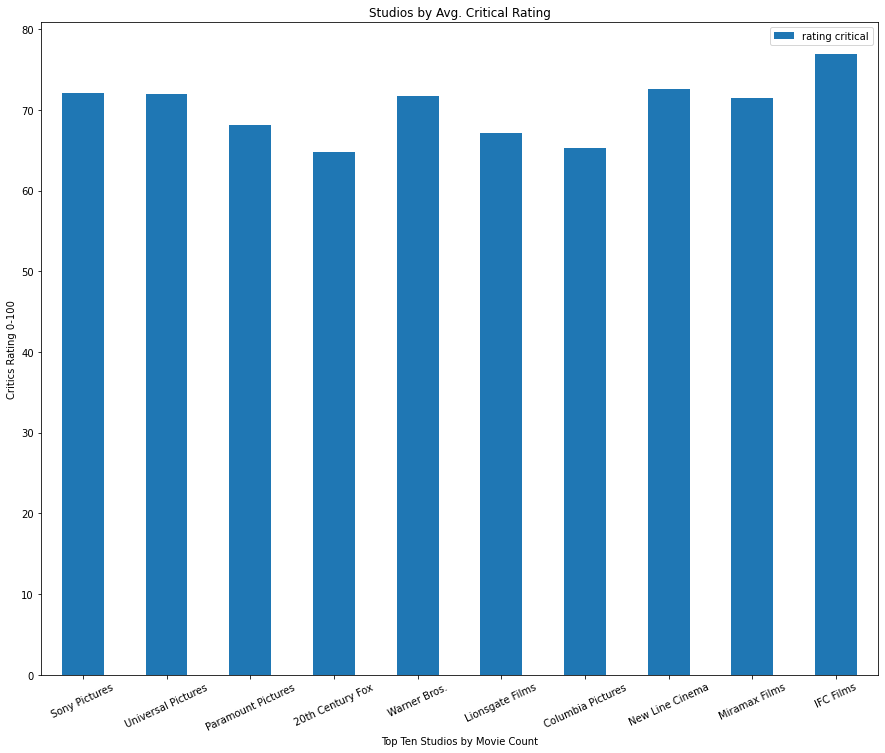

In [91]:
toptenstudios.plot('studio', 'rating critical', kind='bar', rot = 25, figsize = (15,12))

plt.xlabel('Top Ten Studios by Movie Count')
plt.ylabel('Critics Rating 0-100')
plt.title('Studios by Avg. Critical Rating')


Above I narrowed it down to the top ten studios by movie count as we only wanted to include studios that had a long history of producing and distributing movies. 

In [57]:
joinedrtstudio.head(50)

,synopsis,rating guidelines,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,id,review,rating critical,fresh,critic,top_critic,publisher,date,freshnum
id,,,,,,,,,,,,,,,,,,,,
195,Robert Mac MacDougal has an untarnished reputa...,PG-13,Action and Adventure|Drama|Mystery and Suspense,Jon Amiel,William Broyles|Ronald Bass,"Apr 30, 1999","Nov 23, 1999",NaN,NaN,113 minutes,20th Century Fox,6,"Douglas, with Fatal Attraction and Basic Insti...",NaN,fresh,Richard Schickel,1,TIME Magazine,"April 25, 2014",1
1600,When a failed assassination attempt occurs on ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Bryan Singer,Daniel Harris|Dan Harris|Michael Dougherty|Bry...,"May 2, 2003","Nov 25, 2003",$,"214,813,155",134 minutes,20th Century Fox,52,[Bullock] knows one of the secrets of doing ro...,NaN,fresh,Anthony Lane,1,New Yorker,"December 4, 2013",1
1598,Max Payne is a maverick cop - a mythic anti-he...,PG-13,Action and Adventure|Drama|Mystery and Suspense,NaN,Beau Thorne,"Oct 17, 2008","Jan 20, 2009",$,"40,632,110",100 minutes,20th Century Fox,52,It's practically certain to lull moviegoers in...,75.0,fresh,Dennis King,0,Tulsa World,"December 12, 2014",1
1527,Welcome to Mooseport. The sleepy Maine communi...,PG-13,Comedy,Donald Petrie,Doug Richardson|Tom Schulman,"Feb 20, 2004","May 25, 2004",$,"14,244,145",110 minutes,20th Century Fox,45,NaN,0.0,rotten,Nell Minow,0,Movie Mom,"August 20, 2004",0
153,"Meet the kid who made ""wimpy"" cool in a family...",PG,Comedy|Kids and Family,Thor Freudenthal,Jackie Filgo|Jeff Filgo|Gabe Sachs|Jeff Judah,"Mar 19, 2010","Aug 3, 2010",$,"64,001,297",93 minutes,20th Century Fox,3,What we can't argue is that Cosmopolis is the ...,NaN,fresh,Peter Howell,1,Toronto Star,"May 25, 2012",1
1383,"Through a series of misunderstandings, Alvin, ...",PG,Animation|Comedy|Kids and Family,Walt Becker,NaN,"Dec 18, 2015","Mar 15, 2016",$,"66,580,191",86 minutes,20th Century Fox,40,While we'd like it if the film had managed to ...,60.0,fresh,Kenneth Turan,1,Los Angeles Times,"September 18, 2003",1
428,Touted upon its release as the finale of the R...,PG-13,Action and Adventure|Drama,NaN,Sylvester Stallone,"Nov 16, 1990","Mar 18, 2003",NaN,NaN,105 minutes,20th Century Fox,13,Less a moral dilemma than a meditation on the ...,77.0,fresh,Robert Roten,0,Laramie Movie Scope,"November 17, 2007",1
242,Noted R&amp;B; artist and producer Kenneth (Ba...,R,Drama|Mystery and Suspense,Craig Bolotin,Craig Bolotin,"Nov 10, 1999","Jun 13, 2000",NaN,NaN,100 minutes,20th Century Fox,6,NaN,40.0,rotten,Philip Martin,0,Arkansas Democrat-Gazette,"July 31, 2002",0
1256,Marc Forster's psychological thriller Stay sta...,R,Drama|Mystery and Suspense|Science Fiction and...,Marc Forster,David Benioff,"Oct 21, 2005","Mar 28, 2006",$,"3,349,167",99 minutes,20th Century Fox,35,"The Polish brothers make an auspicous debut, a...",80.0,fresh,Luke Y. Thompson,0,New Times,"January 8, 2004",1


# Unused/Rough Draft Visualizations of Studios by Critical Rating

The two visualizations below do not have much use in terms of visualization because each movie is plotted as a different graph thereby producing the chaos below.

<AxesSubplot:xlabel='studio'>

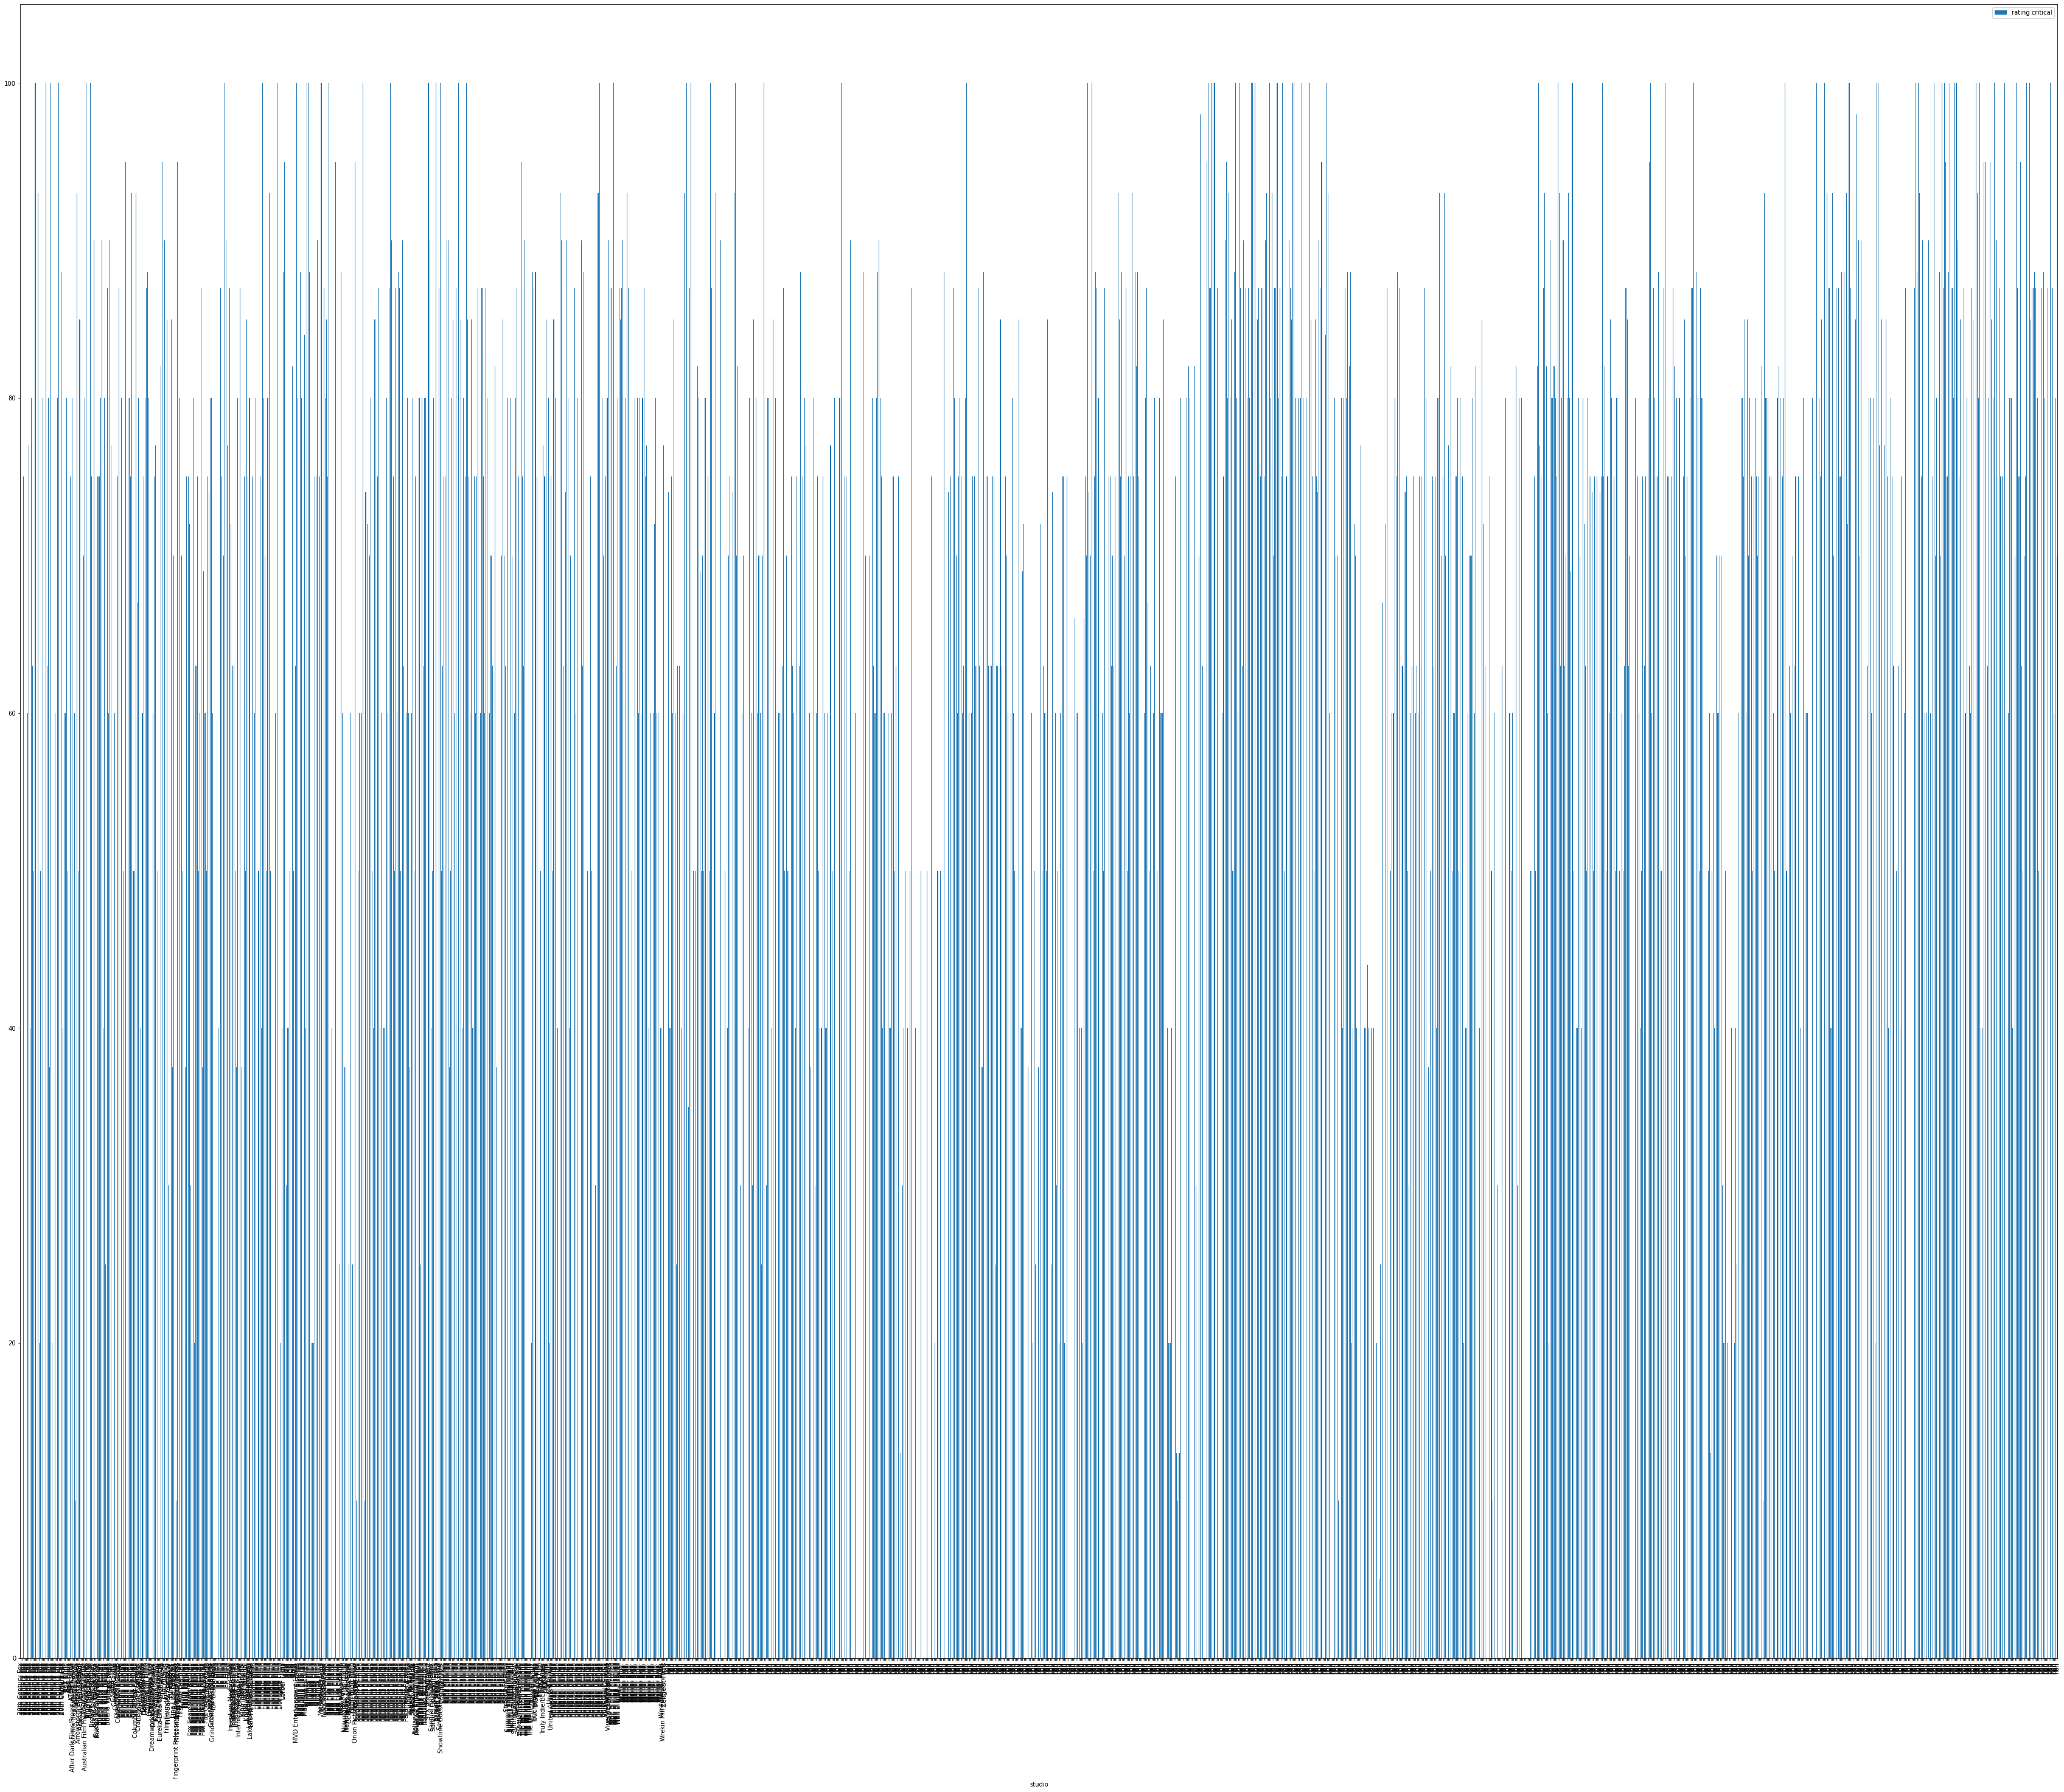

In [58]:
joinedrtstudio.plot('studio', 'rating critical', kind='bar', figsize = (60,50))

<AxesSubplot:xlabel='studio'>

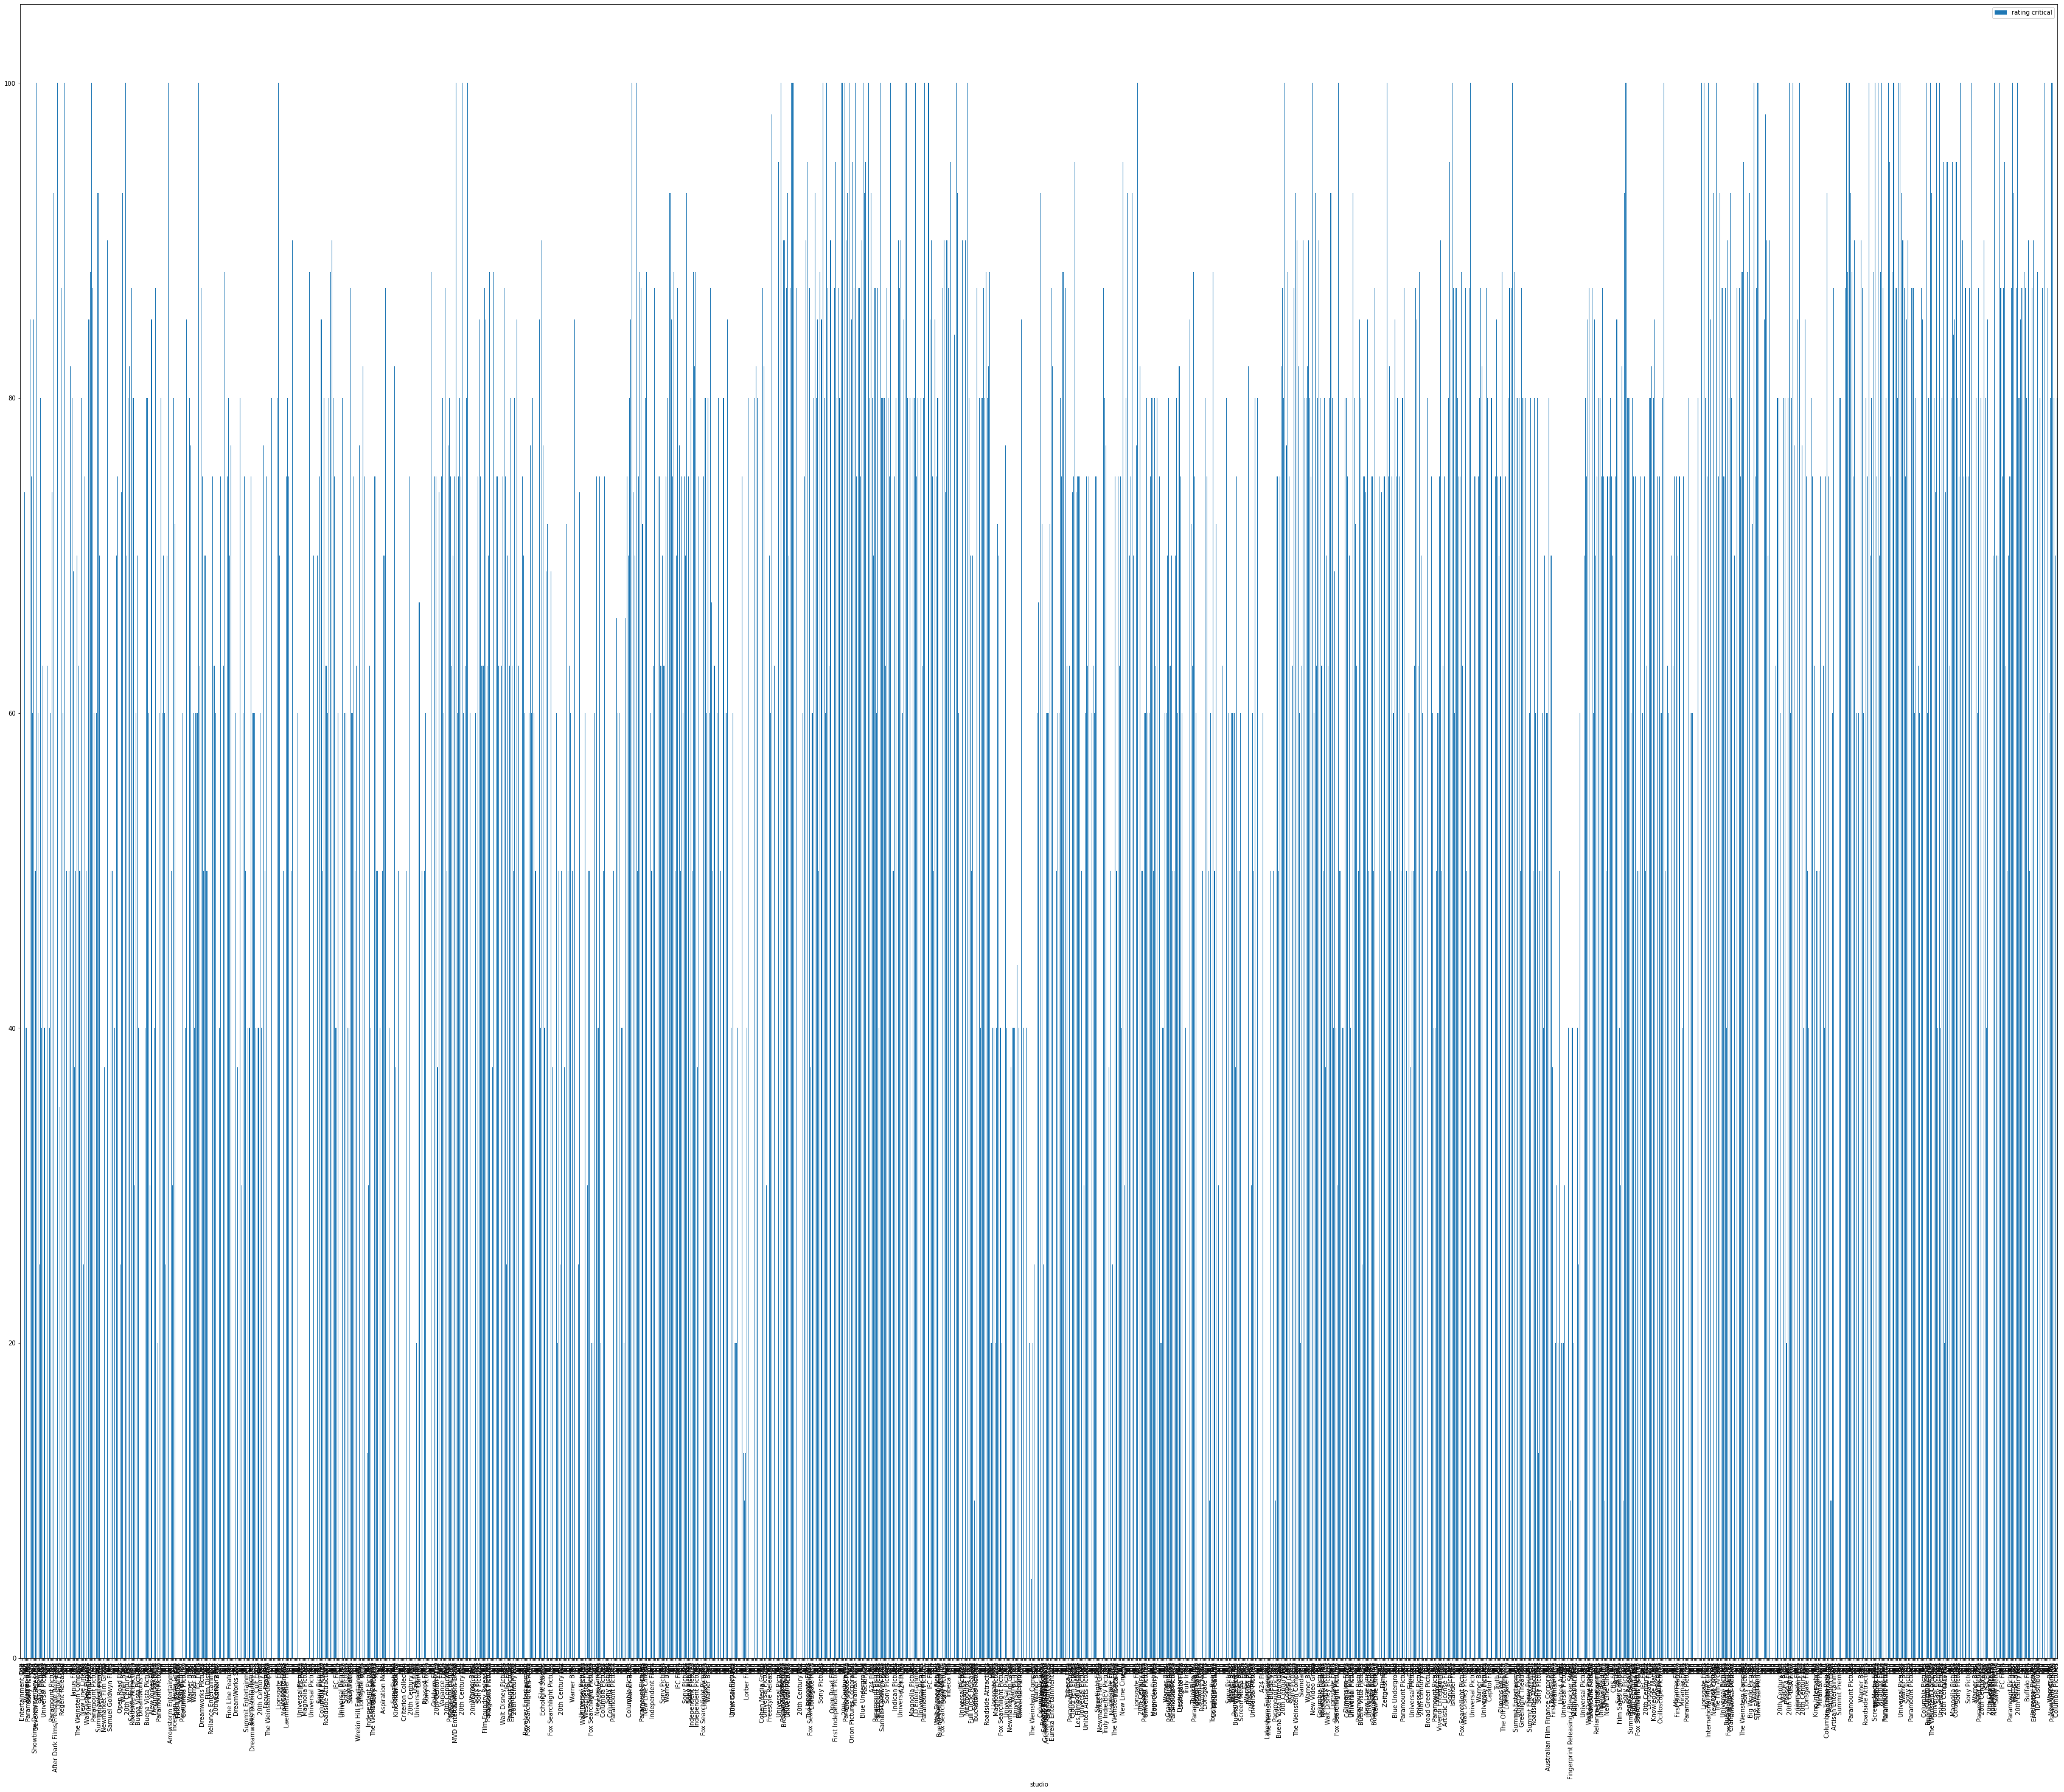

In [59]:
joinedrt.plot('studio', 'rating critical', kind='bar', figsize = (60,50))

# Runtime vs Critical Rating Visualization

Text(0.5, 1.0, 'Runtime vs Critical Rating')

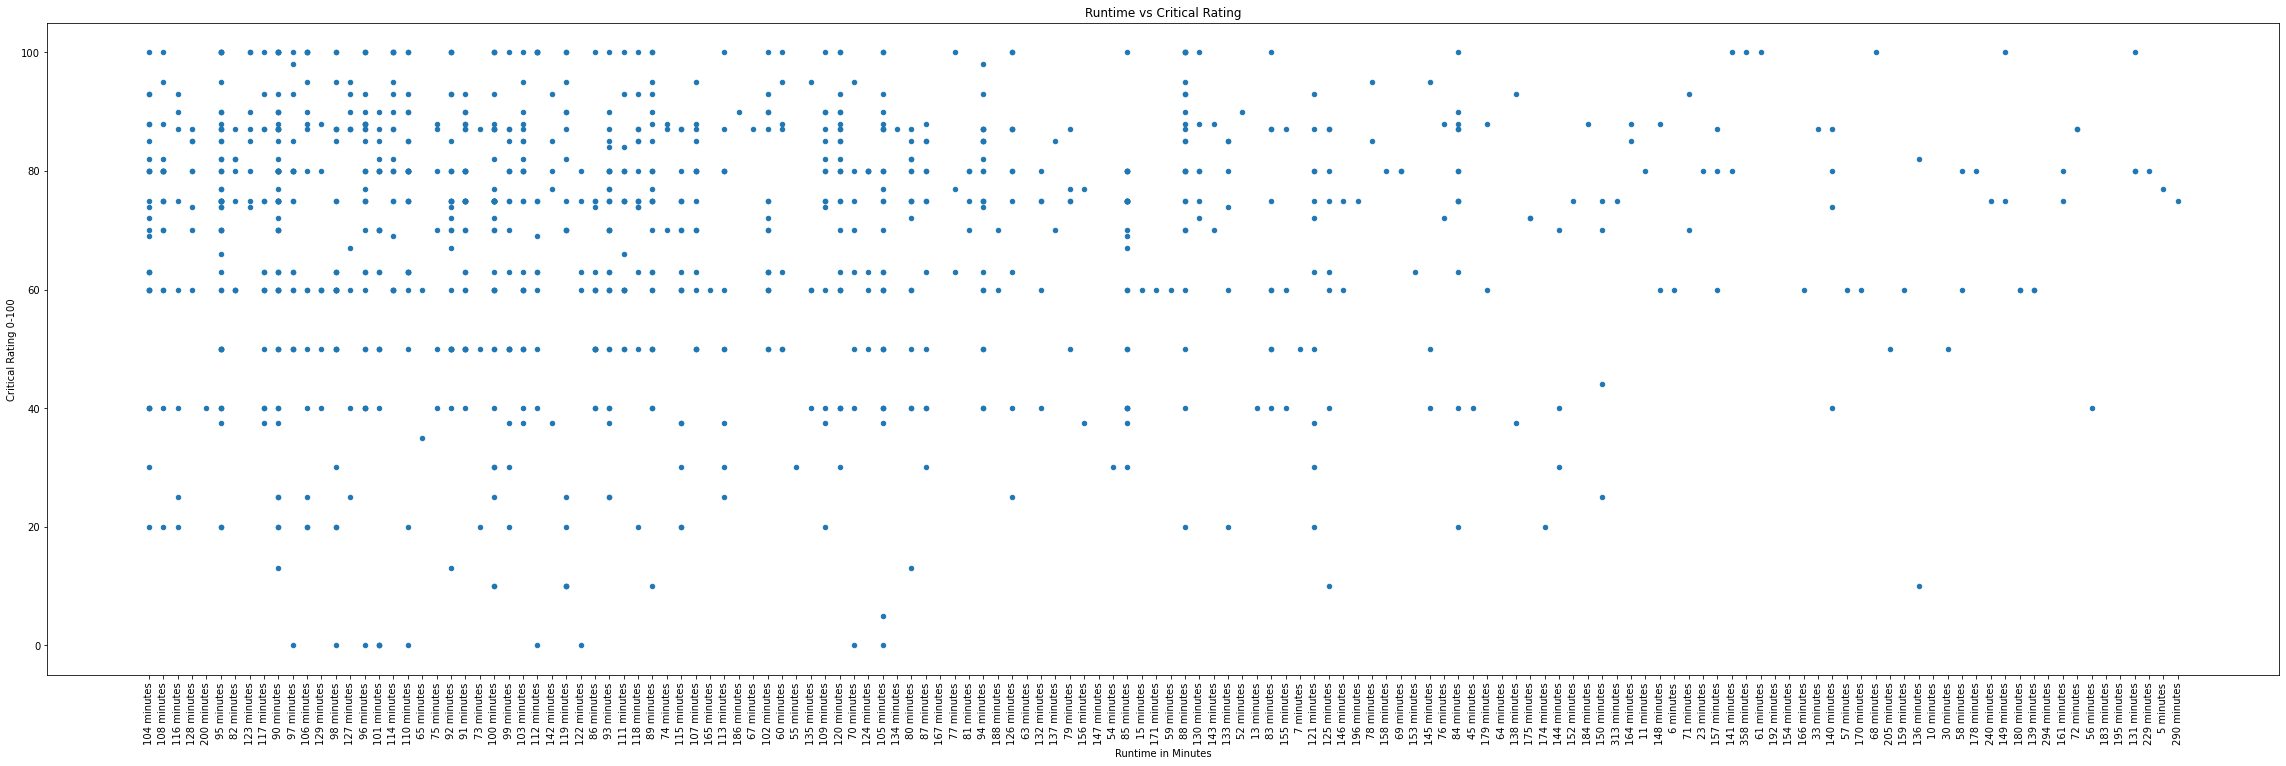

In [42]:
joinedrt.plot('runtime', 'rating critical', kind='scatter', figsize = (40,12))

plt.xticks(rotation = 90);
plt.xlabel('Runtime in Minutes')
plt.ylabel('Critical Rating 0-100')
plt.title('Runtime vs Critical Rating')



Above is a visualization of Runtime vs Critical Rating. We, as a group, decided not to use this viusalization because we did not see any trend standing out to us from this.